In [1]:
import matplotlib.transforms as mtransforms
import matplotlib
import matplotlib.pyplot as plt
import json 
import numpy as np

plt.rcParams['text.latex.preamble']=r"\usepackage{lmodern}"
#Options
params = {'text.usetex' : True,
          'font.size' : 10,
          'font.family' : 'lmodern'
          }
plt.rcParams.update(params) 

In [2]:
jet_chi_Re_acc = json.load(open("DJ_chi_Re_acc_10.json"))
random_chi_Re_acc = json.load(open("DT_chi_Re_acc_10.json"))

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_80658/3941944688.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_80658/3941944688.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_80658/3941944688.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(2, 2, figsize=(3.5, 3), sharey=True, sharex=True,  gridspec_kw={'wspace': 0.3})


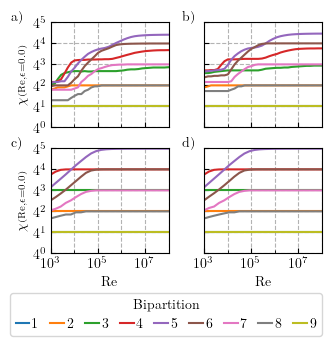

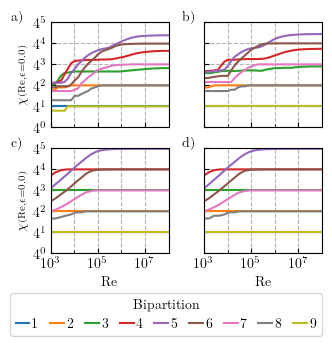

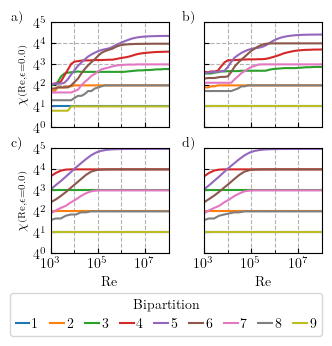

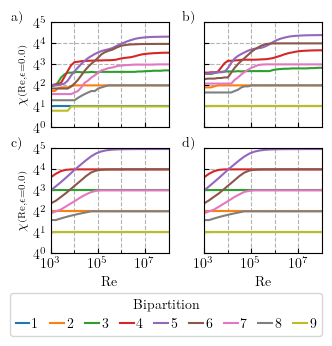

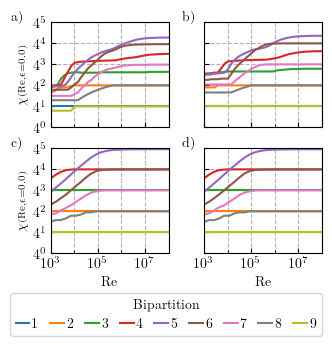

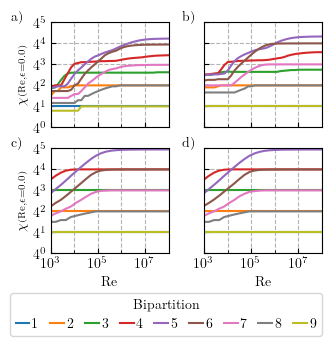

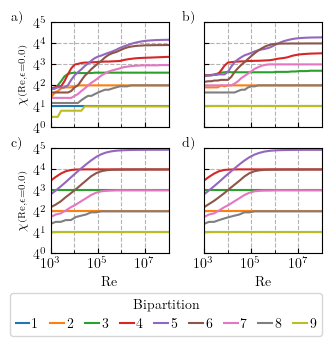

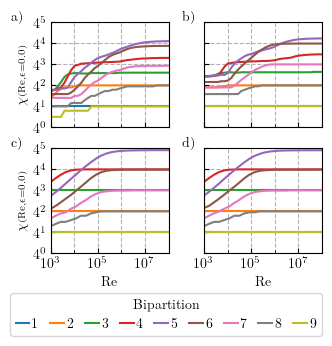

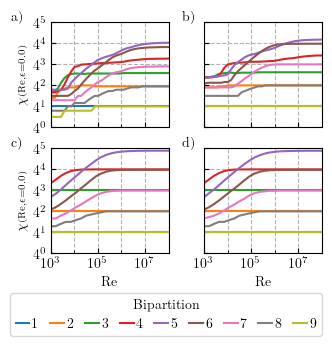

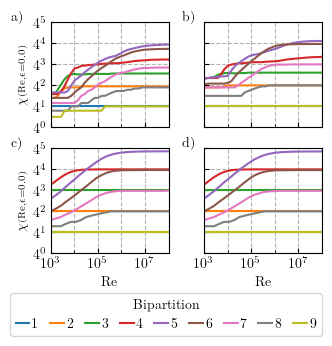

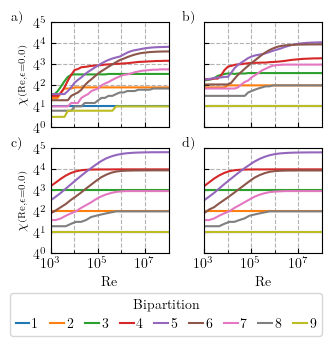

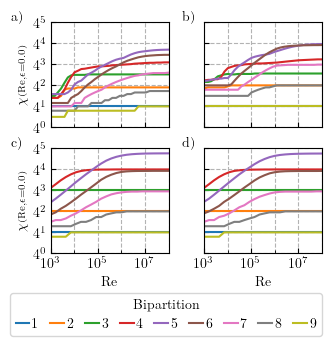

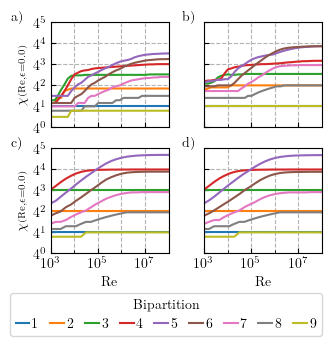

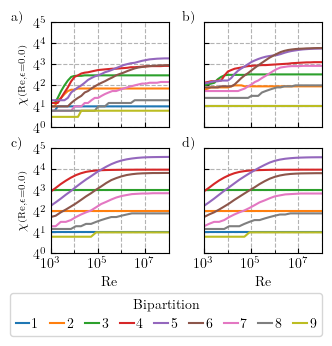

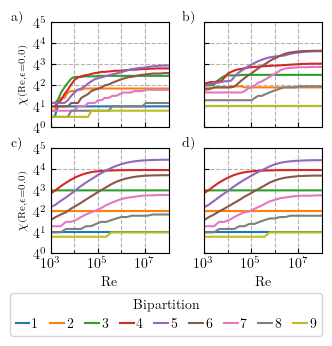

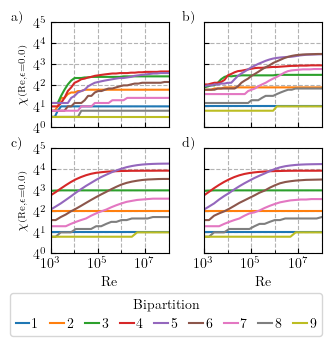

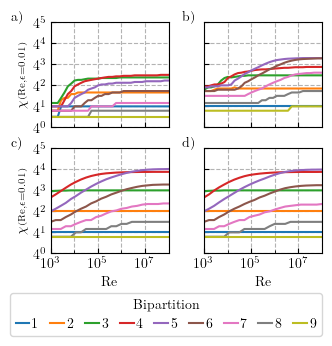

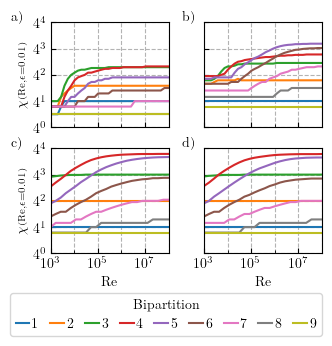

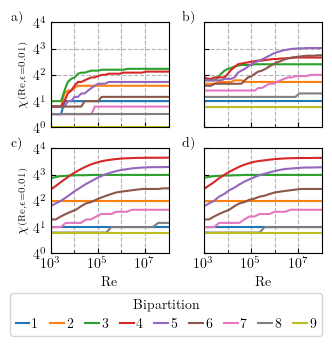

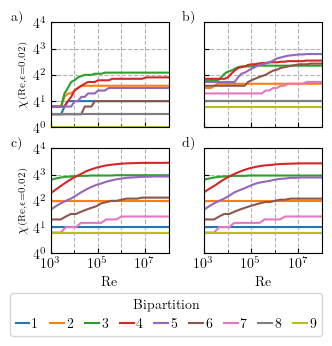

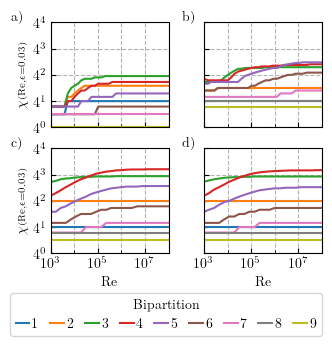

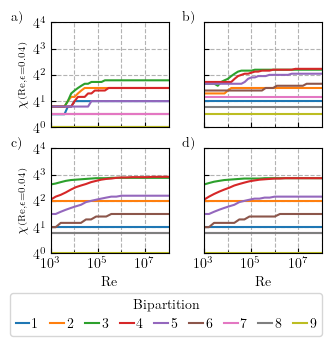

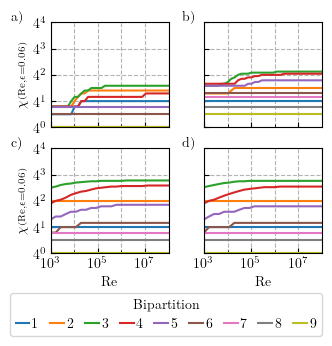

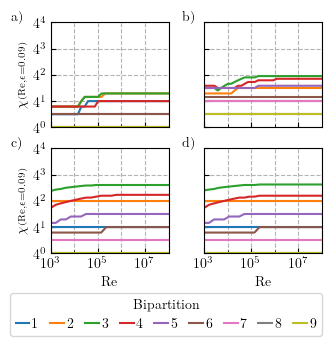

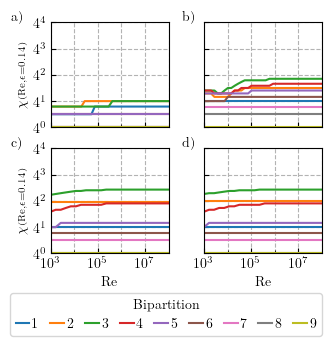

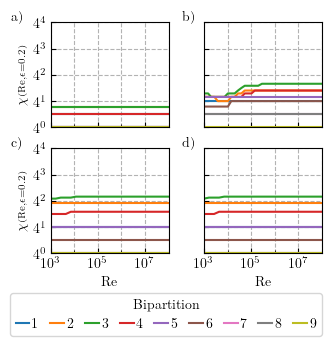

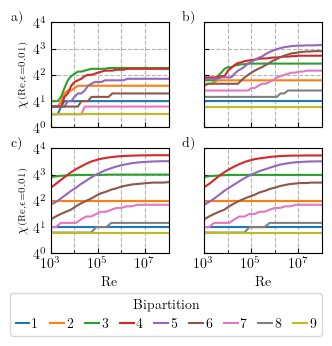

In [3]:
def eval(acc):
    jet_Re_list, jet_max_chi_u_list, jet_max_chi_v_list, jet_chi_bipartitions_u, jet_chi_bipartitions_v = jet_chi_Re_acc[acc]
    random_Re_list, random_max_chi_u_list, random_max_chi_v_list, random_chi_bipartitions_u, random_chi_bipartitions_v = random_chi_Re_acc[acc]
    jet_Re_list = np.array(jet_Re_list)*200

    max_y = 4**4 if max(np.max(random_max_chi_v_list), np.max(random_max_chi_u_list)) < 4**4 else 4**5

    jet_chi_bipartitions_u = np.array(jet_chi_bipartitions_u).T
    jet_chi_bipartitions_v = np.array(jet_chi_bipartitions_v).T
    random_chi_bipartitions_u = np.array(random_chi_bipartitions_u).T
    random_chi_bipartitions_v = np.array(random_chi_bipartitions_v).T

    fig, ax = plt.subplots(2, 2, figsize=(3.5, 3), sharey=True, sharex=True,  gridspec_kw={'wspace': 0.3})

    # TOP LEFT (0, 0)
    for i, chi_bipartition_u in enumerate(jet_chi_bipartitions_u):
        ax[0, 0].plot([x for x, _ in sorted(zip(jet_Re_list, chi_bipartition_u))], [x for _, x in sorted(zip(jet_Re_list, chi_bipartition_u))], ls='-', marker='', label=i+1)
    ylabel = "$\chi\scriptstyle(\mathrm{Re}, \epsilon=" + str(np.round(1-float(acc), 2)) + ")$"
    ax[0, 0].set_ylabel(fr"{ylabel}")
    ax[0, 0].xaxis.grid(True, which="both", ls="--", c='0.7')
    ax[0, 0].yaxis.grid(True, which="both", ls="--", c='0.7')
    ax[0, 0].tick_params(which='both', direction="in")
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax[0, 0].text(-0.1, 0.9, "a)", transform=ax[0, 0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')

    # TOP RIGHT (0, 1)
    for i, chi_bipartition_v in enumerate(jet_chi_bipartitions_v):
        ax[0, 1].plot([x for x, _ in sorted(zip(jet_Re_list, chi_bipartition_v))], [x for _, x in sorted(zip(jet_Re_list, chi_bipartition_v))], ls='-', marker='', label=i+1)
    ax[0, 1].xaxis.grid(True, which="both", ls="--", c='0.7')
    ax[0, 1].yaxis.grid(True, which="both", ls="--", c='0.7')
    ax[0, 1].tick_params(which='both', direction="in")
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax[0, 1].text(0.05, 0.9, "b)", transform=ax[0, 1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')

    # BOTTOM LEFT (1, 0)
    for i, chi_bipartition_u in enumerate(random_chi_bipartitions_u):
        ax[1, 0].plot([x for x, _ in sorted(zip(random_Re_list, chi_bipartition_u))], [x for _, x in sorted(zip(random_Re_list, chi_bipartition_u))], ls='-', marker='', label=i+1)
    ax[1, 0].set_xlabel(r"$\mathrm{Re}$")
    ax[1, 0].set_ylabel(fr"{ylabel}")
    ax[1, 0].xaxis.grid(True, which="both", ls="--", c='0.7')
    ax[1, 0].yaxis.grid(True, which="both", ls="--", c='0.7')
    ax[1, 0].tick_params(which='both', direction="in")
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax[1, 0].text(-0.1, 0.9, "c)", transform=ax[1, 0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')

    # BOTTOM RIGHT (1, 1)
    for i, chi_bipartition_v in enumerate(random_chi_bipartitions_v):
        ax[1, 1].plot([x for x, _ in sorted(zip(random_Re_list, chi_bipartition_v))], [x for _, x in sorted(zip(random_Re_list, chi_bipartition_v))], ls='-', marker='', label=i+1)
    ax[1, 1].set_xlabel(r"$\mathrm{Re}$")
    ax[1, 1].xaxis.grid(True, which="both", ls="--", c='0.7')
    ax[1, 1].yaxis.grid(True, which="both", ls="--", c='0.7')
    ax[1, 1].tick_params(which='both', direction="in")
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax[1, 1].text(0.05, 0.9, "d)", transform=ax[1, 1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')

    # GENERAL SETTINGS
    ax[0, 0].set_xscale('log')
    ax[0, 0].set_yscale('log', base=4)
    ax[0, 0].set_ylim([4**0, max_y])
    y_ticks = [4**n for n in range(int(np.emath.logn(4, max_y))+1)]
    ax[0, 0].set_yticks(y_ticks)
    ax[0, 0].set_xlim([1e3, 1e8])
    ax[0, 0].set_xticks([1e3, 1e5, 1e7])
    ax[0, 0].set_xticks([1e4, 1e6, 1e8], minor=True, labels=[""]*3)
    fig.legend(*ax[0, 1].get_legend_handles_labels(), loc='upper center', bbox_to_anchor=(0.455, -0.0), ncol=9, fancybox=True, title=r'Bipartition', handlelength=1, handletextpad=0.2, columnspacing=0.8)
    fig.tight_layout()

    plt.savefig(f"chi_Re_{np.round(1-float(acc), 10)}.pdf", bbox_inches="tight")
    

for acc in jet_chi_Re_acc.keys():
    eval(acc)

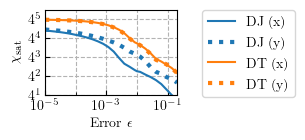

In [4]:
err_list = []
jet_max_chi_u = []
jet_max_chi_v = []
random_max_chi_u = []
random_max_chi_v = []

for acc in jet_chi_Re_acc.keys():
    jet_Re_list, jet_max_chi_u_list, jet_max_chi_v_list, jet_chi_bipartitions_u, jet_chi_bipartitions_v = jet_chi_Re_acc[acc]
    random_Re_list, random_max_chi_u_list, random_max_chi_v_list, random_chi_bipartitions_u, random_chi_bipartitions_v = random_chi_Re_acc[acc]
    jet_Re_list = np.array(jet_Re_list)*200

    jet_chi_bipartitions_u = np.array(jet_chi_bipartitions_u).T
    jet_chi_bipartitions_v = np.array(jet_chi_bipartitions_v).T
    random_chi_bipartitions_u = np.array(random_chi_bipartitions_u).T
    random_chi_bipartitions_v = np.array(random_chi_bipartitions_v).T

    err_list.append(1-float(acc))
    jet_max_chi_u.append(max(jet_max_chi_u_list))
    jet_max_chi_v.append(max(jet_max_chi_v_list))
    random_max_chi_u.append(max(random_max_chi_u_list))
    random_max_chi_v.append(max(random_max_chi_v_list))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax = plt.subplots(1, 1, figsize=(2, 1.5))
ax.plot([x for x, _ in sorted(zip(err_list, jet_max_chi_u))], [x for _, x in sorted(zip(err_list, jet_max_chi_u))], c=colors[0], ls='-', label="DJ (x)")
ax.plot([x for x, _ in sorted(zip(err_list, jet_max_chi_v))], [x for _, x in sorted(zip(err_list, jet_max_chi_v))], c=colors[0], ls="dotted", label="DJ (y)", lw=3)#ls=(0, (5, 1)))
ax.plot([x for x, _ in sorted(zip(err_list, random_max_chi_u))], [x for _, x in sorted(zip(err_list, random_max_chi_u))], c=colors[1], ls='-', label="DT (x)")
ax.plot([x for x, _ in sorted(zip(err_list, random_max_chi_v))], [x for _, x in sorted(zip(err_list, random_max_chi_v))], c=colors[1], ls="dotted", label="DT (y)", lw=3)#ls=(0, (5, 1)))
# ax.plot([x for x, _ in sorted(zip(err_list, jet_max_chi_u))], [x for _, x in sorted(zip(err_list, jet_max_chi_u))], c=colors[0], ls=(0, (3, 5, 1, 5, 1, 5)), label="DJ (x)")
# ax.plot([x for x, _ in sorted(zip(err_list, jet_max_chi_v))], [x for _, x in sorted(zip(err_list, jet_max_chi_v))], c=colors[0], ls="dotted", label="DJ (y)")#ls=(0, (5, 1)))
# ax.plot([x for x, _ in sorted(zip(err_list, random_max_chi_u))], [x for _, x in sorted(zip(err_list, random_max_chi_u))], c=colors[1], ls=(0, (3, 5, 1, 5, 1, 5)), label="DT (x)")
# ax.plot([x for x, _ in sorted(zip(err_list, random_max_chi_v))], [x for _, x in sorted(zip(err_list, random_max_chi_v))], c=colors[1], ls="dotted", label="DT (y)")#ls=(0, (5, 1)))
ax.set_xscale('log')
ax.set_yscale('log', base=4)
ax.set_xlabel(r"Error $\epsilon$")
ax.set_ylabel(r"$\chi_\mathrm{sat}$")
ax.xaxis.grid(True, which="both", ls="--", c='0.7')
ax.yaxis.grid(True, which="both", ls="--", c='0.7')
ax.set_ylim([4**1, 2*4**5])
ax.set_xticks([1e-1, 1e-3, 1e-5])
ax.set_xticks([1e-2, 1e-4], minor=True, labels=[""]*2)
ax.set_yticks([4**1, 4**2, 4**3, 4**4, 4**5])
ax.set_xlim([1e-5, 2e-1])
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax[0].text(-0.1, 0.9, "a)", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax.tick_params(which='both', direction="in")
# handles, labels = ax[1].get_legend_handles_labels()
fig.legend(*ax.get_legend_handles_labels(), loc='center left', bbox_to_anchor=(1, 0.61), ncol=1, fancybox=True)
fig.tight_layout()
plt.savefig("chi_sat_err.pdf", bbox_inches="tight")
plt.show()